df shape: (2580, 80)


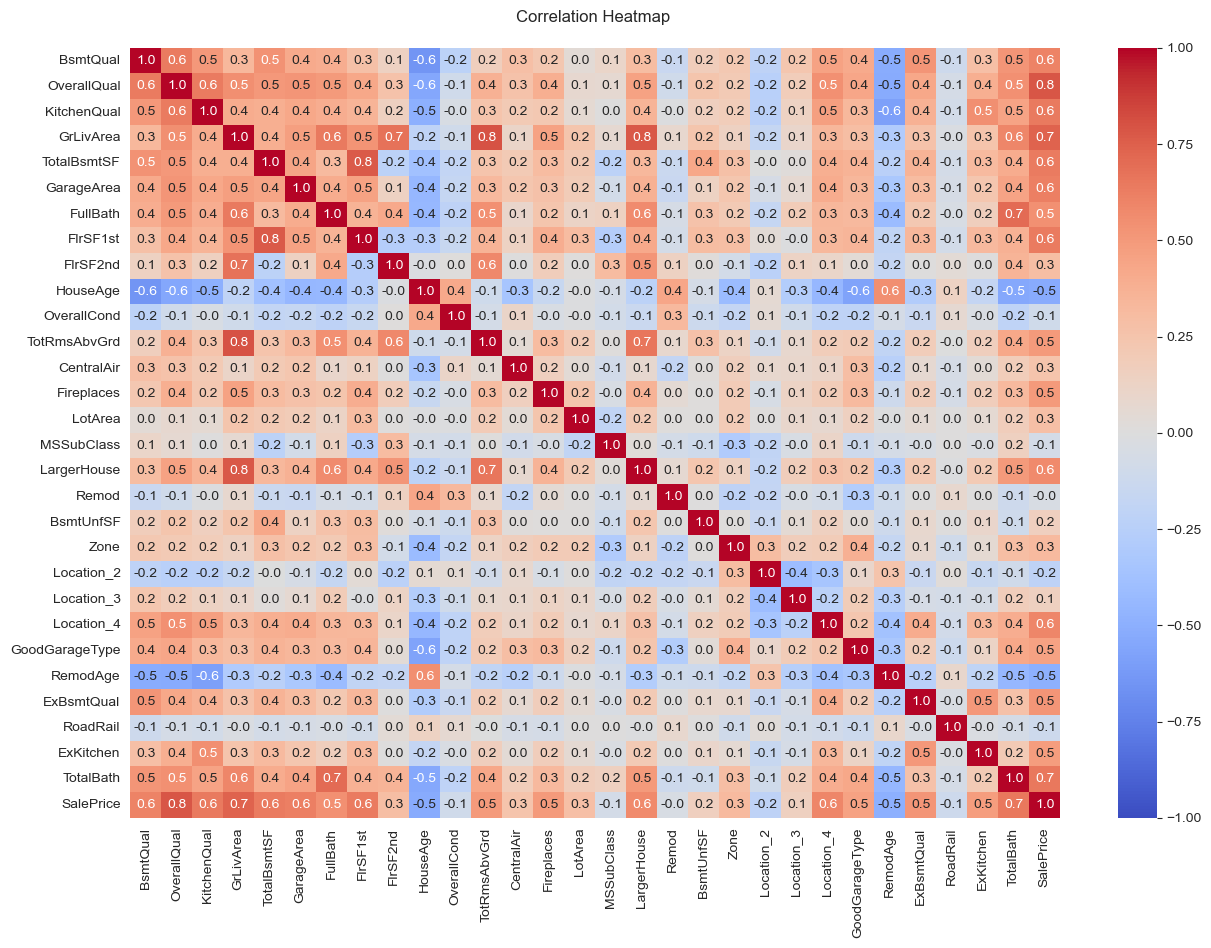

LotArea       13.647537
ExKitchen      4.212534
RoadRail       3.690437
ExBsmtQual     3.571738
Location_4     1.821239
Location_3     1.405190
MSSubClass     1.339800
FlrSF1st       1.045575
BsmtUnfSF      0.981279
GrLivArea      0.943880
FlrSF2nd       0.804334
Zone          -1.733407
CentralAir    -3.705920
dtype: float64
Shuffled cross validation score: [0.9272 0.9269 0.9327 0.9324 0.9489]
Mean shuffled cross validation score: 0.9336
RMSE Shuffled cross validation score: [0.095  0.1    0.0909 0.0974 0.0829]
RMSE Mean shuffled cross validation score: 0.0932
Test score: 0.9317
RMSE Test score: 0.0977
16515.1487198161
16925.553579966592


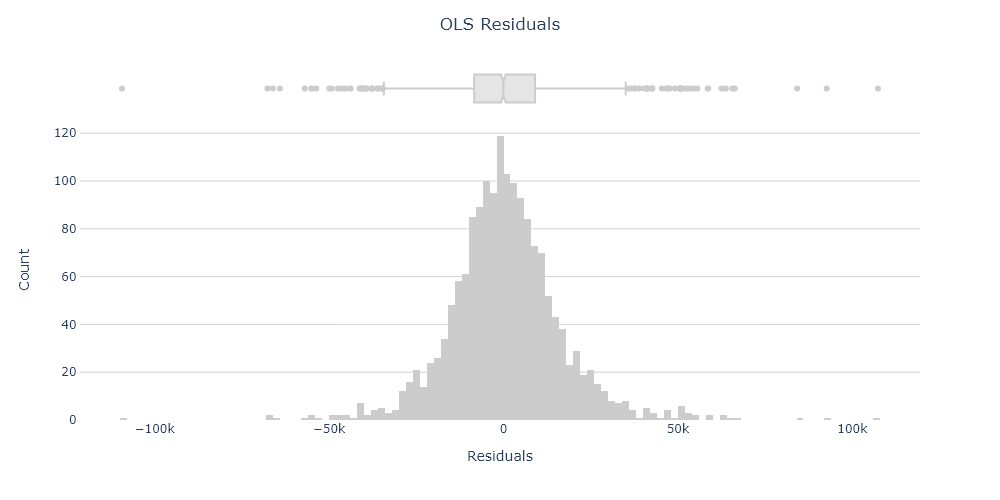

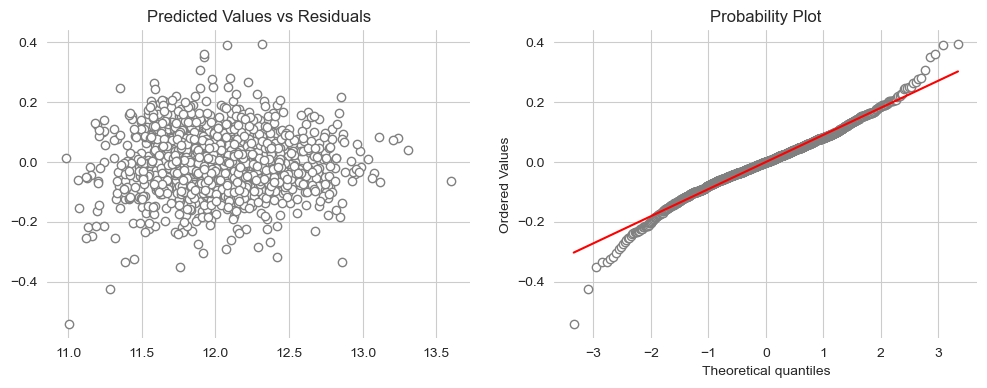

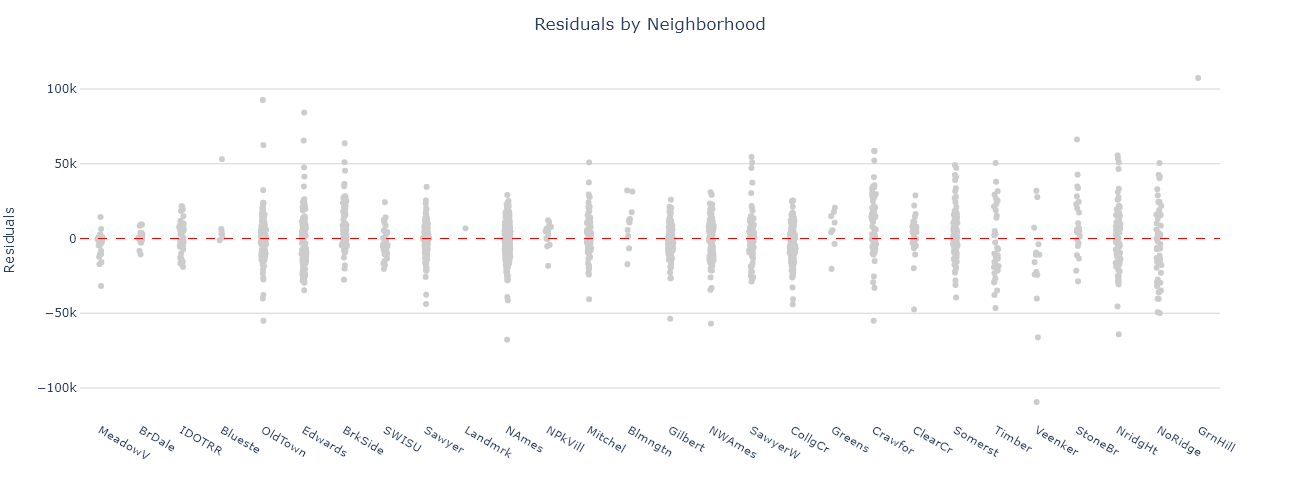

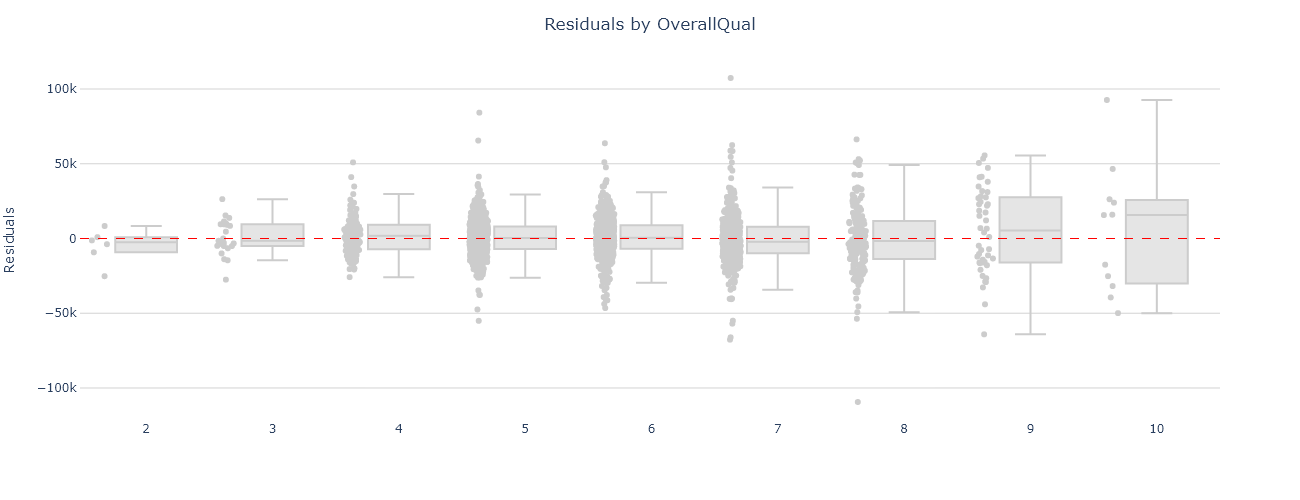

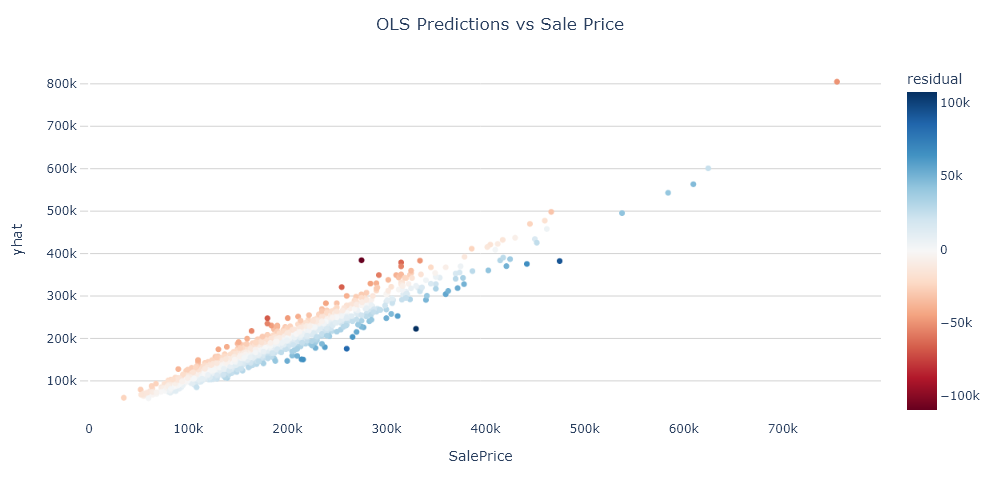

Best alpha: 0.00090542266527849
RMSE: 0.09799416082269041
Shuffled cross validation score: [0.9299 0.9377]
Mean shuffled cross validation score: 0.9338
RMSE Shuffled cross validation score: [0.0959 0.0909]
RMSE Mean shuffled cross validation score: 0.0934
16504.912163166035
17018.846205894162


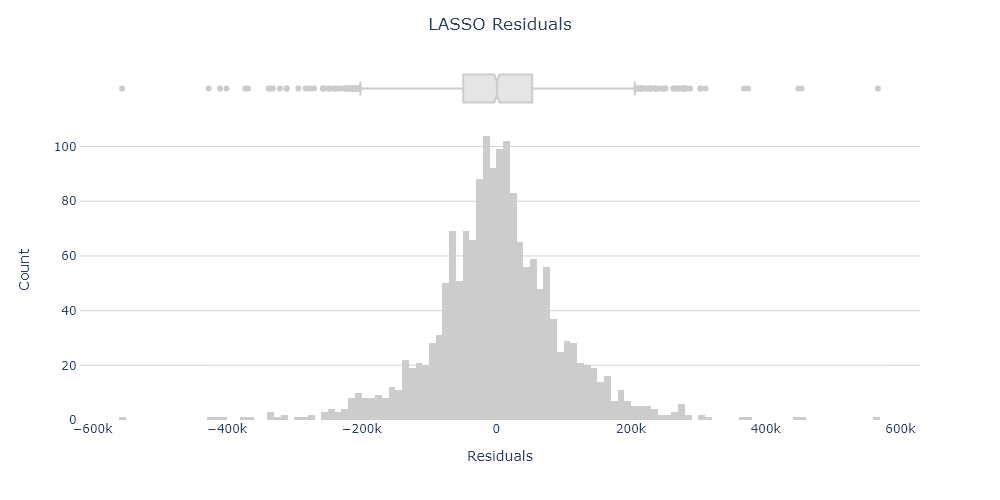

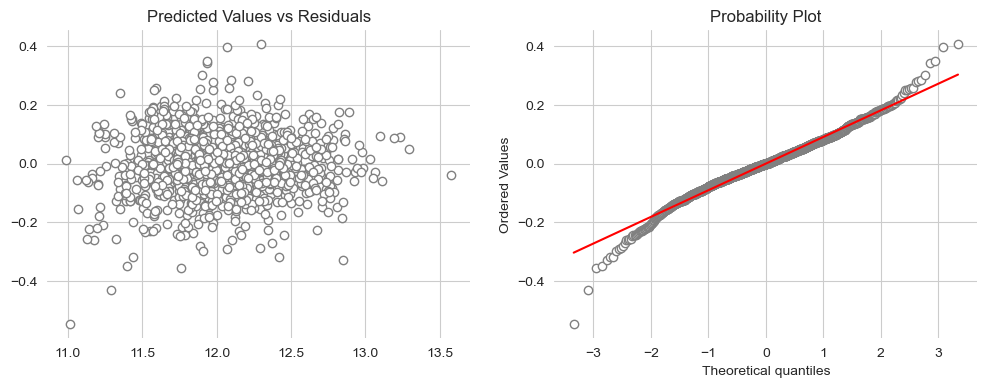

Best alpha: 10.0
RMSE: 0.09768862181144423
Shuffled cross validation score: [0.9271 0.9268 0.9331 0.9329 0.9486]
Mean shuffled cross validation score: 0.9337
RMSE Shuffled cross validation score: [0.095  0.1    0.0906 0.097  0.0831]
RMSE Mean shuffled cross validation score: 0.0932
16510.72076054001
16912.045017309465


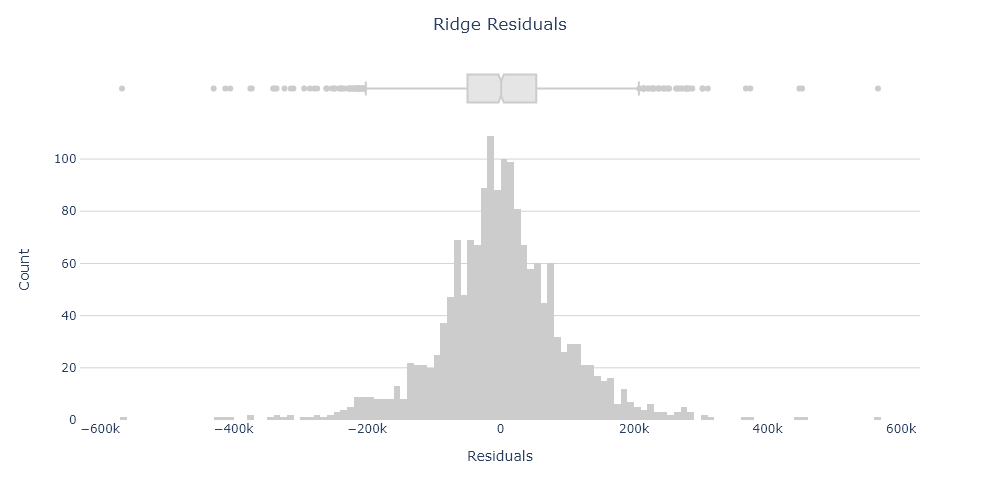

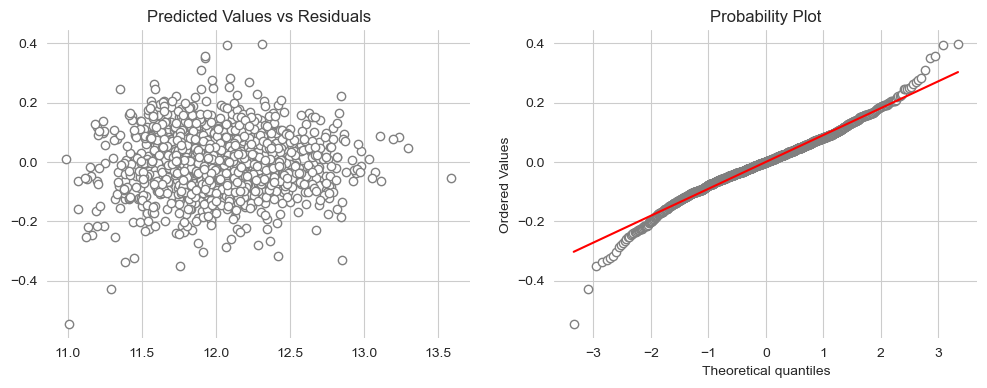

Intercept                       48046.380526
Location_4[T.True]             -24105.600305
GrLivArea                          78.012211
GrLivArea:Location_4[T.True]       55.070900
dtype: float64
16586.857642956977
16883.391638051646


In [183]:
%run 2_Linear_Regression.ipynb

### ANN

- This is a simple ANN model with 2 hidden layers and 3 neurons each.

In [83]:
import tensorflow as tf
print( tf.__version__) #version

2.13.0


In [2]:
import numpy 
print( numpy.__version__)

1.24.4


In [20]:
df.shape

(2096, 106)

In [11]:
df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FlrSF1st,FlrSF2nd,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr,YearBuilt_Group,HouseAge,RemodAge,TotalSF,TotalBath,RoadRail,GoodGarageType,Zone,CulDSac,Exterior1st_top,TwoStory,ExQual,LargerHouse,Remod,ExBsmtQual,HasFireplace,ExKitchen,ExterQual,BsmtQual,KitchenQual,ExterCond,Location_2,Location_3,Location_4,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,1,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,None,None,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,1980-1999,25,25,2098.0,3.0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,False,False,False,True,False,False,False,False,False,True
1,535377150,1039,114000,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,1,SBrkr,717,322,0,0.0,0.0,1,0,2,1,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,None,None,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,Before 1900,109,6,1444.0,1.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,False,False,False,False,False,False,False,False,False,False
2,534177230,1665,227000,60,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,1,SBrkr,810,855,0,1.0,0.0,2,1,3,1,6,Typ,0,None,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,None,None,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,2000 and later,8,8,2475.0,3.5,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,True,False,False,False,True,False,False,False,False,False
3,908128060,1922,198500,85,RL,64.0,7301,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Ex,1,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,None,None,0,7,2009,ConLD,Normal,908128060.0,4003 MARIGOLD DR,2000 and later,6,6,1922.0,3.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,2.0,False,False,False,False,False,True,False,False,False,False
4,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,Inside,Mod,OldTown,Norm,Norm,1Story,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,0,SBrkr,936,0,0,0.0,0.0,1,0,2,1,4,Min2,0,None,Detchd,1974.0,Unf,2.0,576.0,TA,TA,Y,0,32,112,0,0,None,None,0,2,2009,WD,Normal,902135020.0,212 10TH ST 210,1940-1979,56,56,1872.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,False,False,False,True,False,False,True,False,False,False


In [75]:
#initialize ANN
ann = tf.keras.models.Sequential()

#add input layer
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

#add second hidden layer
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

#add output layer
ann.add(tf.keras.layers.Dense(units=1))

In [38]:
X_train_scaled.shape

(1678, 29)

In [93]:
#training ANN
ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(X_train_scaled, y_train, batch_size=32, epochs=500)

Epoch 1/500
53/53 [==============================] - 0s 974us/step - loss: 0.0090
Epoch 2/500
53/53 [==============================] - 0s 783us/step - loss: 0.0084
Epoch 3/500
53/53 [==============================] - 0s 811us/step - loss: 0.0086
Epoch 4/500
53/53 [==============================] - 0s 915us/step - loss: 0.0090
Epoch 5/500
53/53 [==============================] - 0s 785us/step - loss: 0.0088
Epoch 6/500
53/53 [==============================] - 0s 837us/step - loss: 0.0084
Epoch 7/500
53/53 [==============================] - 0s 952us/step - loss: 0.0086
Epoch 8/500
53/53 [==============================] - 0s 830us/step - loss: 0.0087
Epoch 9/500
53/53 [==============================] - 0s 889us/step - loss: 0.0084
Epoch 10/500
53/53 [==============================] - 0s 924us/step - loss: 0.0085
Epoch 11/500
53/53 [==============================] - 0s 842us/step - loss: 0.0084
Epoch 12/500
53/53 [==============================] - 0s 853us/step - loss: 0.0085
Epoch 13/500


53/53 [==============================] - 0s 843us/step - loss: 0.0085
Epoch 100/500
53/53 [==============================] - 0s 844us/step - loss: 0.0086
Epoch 101/500
53/53 [==============================] - 0s 885us/step - loss: 0.0089
Epoch 102/500
53/53 [==============================] - 0s 828us/step - loss: 0.0091
Epoch 103/500
53/53 [==============================] - 0s 908us/step - loss: 0.0085
Epoch 104/500
53/53 [==============================] - 0s 875us/step - loss: 0.0085
Epoch 105/500
53/53 [==============================] - 0s 939us/step - loss: 0.0085
Epoch 106/500
53/53 [==============================] - 0s 856us/step - loss: 0.0089
Epoch 107/500
53/53 [==============================] - 0s 887us/step - loss: 0.0084
Epoch 108/500
53/53 [==============================] - 0s 871us/step - loss: 0.0086
Epoch 109/500
53/53 [==============================] - 0s 912us/step - loss: 0.0087
Epoch 110/500
53/53 [==============================] - 0s 801us/step - loss: 0.0087
Epoch 

53/53 [==============================] - 0s 966us/step - loss: 0.0087
Epoch 198/500
53/53 [==============================] - 0s 839us/step - loss: 0.0083
Epoch 199/500
53/53 [==============================] - 0s 803us/step - loss: 0.0085
Epoch 200/500
53/53 [==============================] - 0s 743us/step - loss: 0.0085
Epoch 201/500
53/53 [==============================] - 0s 726us/step - loss: 0.0086
Epoch 202/500
53/53 [==============================] - 0s 759us/step - loss: 0.0085
Epoch 203/500
53/53 [==============================] - 0s 761us/step - loss: 0.0087
Epoch 204/500
53/53 [==============================] - 0s 748us/step - loss: 0.0084
Epoch 205/500
53/53 [==============================] - 0s 743us/step - loss: 0.0087
Epoch 206/500
53/53 [==============================] - 0s 752us/step - loss: 0.0086
Epoch 207/500
53/53 [==============================] - 0s 776us/step - loss: 0.0086
Epoch 208/500
53/53 [==============================] - 0s 765us/step - loss: 0.0088
Epoch 

53/53 [==============================] - 0s 742us/step - loss: 0.0086
Epoch 295/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 296/500
53/53 [==============================] - 0s 954us/step - loss: 0.0086
Epoch 297/500
53/53 [==============================] - 0s 945us/step - loss: 0.0087
Epoch 298/500
53/53 [==============================] - 0s 828us/step - loss: 0.0085
Epoch 299/500
53/53 [==============================] - 0s 785us/step - loss: 0.0084
Epoch 300/500
53/53 [==============================] - 0s 831us/step - loss: 0.0085
Epoch 301/500
53/53 [==============================] - 0s 839us/step - loss: 0.0086
Epoch 302/500
53/53 [==============================] - 0s 791us/step - loss: 0.0084
Epoch 303/500
53/53 [==============================] - 0s 842us/step - loss: 0.0085
Epoch 304/500
53/53 [==============================] - 0s 812us/step - loss: 0.0087
Epoch 305/500
53/53 [==============================] - 0s 803us/step - loss: 0.0087
Epoch 30

53/53 [==============================] - 0s 974us/step - loss: 0.0083
Epoch 392/500
53/53 [==============================] - 0s 803us/step - loss: 0.0084
Epoch 393/500
53/53 [==============================] - 0s 869us/step - loss: 0.0086
Epoch 394/500
53/53 [==============================] - 0s 936us/step - loss: 0.0084
Epoch 395/500
53/53 [==============================] - 0s 823us/step - loss: 0.0086
Epoch 396/500
53/53 [==============================] - 0s 809us/step - loss: 0.0084
Epoch 397/500
53/53 [==============================] - 0s 793us/step - loss: 0.0086
Epoch 398/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 399/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 400/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 401/500
53/53 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 402/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 403/500
53

53/53 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 490/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 491/500
53/53 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 492/500
53/53 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 493/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 494/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 495/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 496/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 497/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 498/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 499/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 500/500
53/53 [==============================] - 0s 1ms/step - loss: 0.0086


In [77]:
y_pred = ann.predict(X_test_scaled)
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse_ann)

23/23 [==============================] - 0s 2ms/step
RMSE: 0.09966106535101855


In [86]:
yhat_train = ann.predict(X_train_scaled)
yhat_test = ann.predict(X_test_scaled)

train_mse_non_log = mean_squared_error(np.exp(y_train), np.exp(yhat_train), squared=False)
test_mse_non_log = mean_squared_error(np.exp(y_test), np.exp(yhat_test), squared=False)

print(train_mse_non_log)
print(test_mse_non_log)

23/23 [==============================] - 0s 1ms/step
16210.575108205745
17411.405988276416


### PCR

In [179]:
#Apply PCA. Generate n principal components e n=the number of features
from sklearn.decomposition import PCA
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_test_pc = pca.transform(X_test_scaled)

X_train_pc.shape


(1678, 29)

In [180]:
#View explained variance ratio for each PC
pca.explained_variance_ratio_.reshape(-1,1)

array([[2.80881228e-01],
       [9.56251734e-02],
       [8.79695875e-02],
       [6.63330020e-02],
       [5.26438750e-02],
       [4.81074649e-02],
       [3.73857381e-02],
       [3.37152748e-02],
       [3.25830027e-02],
       [2.92668810e-02],
       [2.62573323e-02],
       [2.41972612e-02],
       [2.34040862e-02],
       [2.01141409e-02],
       [1.90331913e-02],
       [1.85503850e-02],
       [1.39598058e-02],
       [1.34887874e-02],
       [1.32765053e-02],
       [1.11809835e-02],
       [1.02603302e-02],
       [9.35670129e-03],
       [8.48033995e-03],
       [6.22122237e-03],
       [5.56091051e-03],
       [4.80852676e-03],
       [3.66769128e-03],
       [3.54607609e-03],
       [1.24495130e-04]])

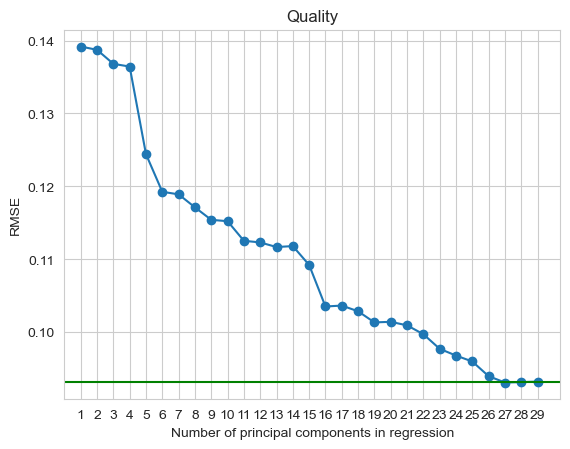

In [187]:
#determine number of PCs to use in linear regression
cv = KFold(n_splits=5, shuffle=True, random_state=10)

# Initialize linear regression instance
lin_pca = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_pca, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=0.0932, color='g', linestyle='-');


- The green line above shows the RMSE benchmark of the regular linear regression model.
- The blue line represents the improvement of RMSE as more Principal Components are added to the analysis.
- We can see that when 27 PCs are added, the performance is similar or slightly better than the linear regression.
- We try a linear regression with 27 components below.

In [202]:
# Visually determine optimal number of principal components
best_pc_num = 27

# Get first 27 principal components
X_train_pc = X_train_pc[:,:best_pc_num]
X_test_pc = X_test_pc[:,:best_pc_num]

# Train model with first 27 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)


# # Predict on test data
# preds = lin_reg_pc.predict(X_test_pc)
# pcr_score_test = mean_squared_error(y_test, preds, squared=False)


cv_scores_shuffled = cross_val_score(lin_reg_pc, X_train_pc, y_train, cv=cv)
cv_results_RMSE = np.sqrt(-cross_val_score(lin_reg_pc, X_train_pc, y_train, scoring="neg_mean_squared_error", cv=cv))
cv_results_RMSE = np.sqrt(-cross_val_score(lin_reg_pc, X_train_pc, y_train, scoring="neg_mean_squared_error", cv=cv))


print('Shuffled cross validation score:', np.round(cv_scores_shuffled, 4))
print('Mean shuffled cross validation score:', np.round(cv_scores_shuffled.mean(), 4))

print('RMSE Shuffled cross validation score:', np.round(cv_results_RMSE, 4))
print('RMSE Mean shuffled cross validation score:', np.round(cv_results_RMSE.mean(), 4))

Shuffled cross validation score: [0.9274 0.9271 0.933  0.9324 0.9489]
Mean shuffled cross validation score: 0.9338
RMSE Shuffled cross validation score: [0.0948 0.0998 0.0907 0.0973 0.0829]
RMSE Mean shuffled cross validation score: 0.0931


In [203]:
test_score = lin_reg_pc.score(X_test_pc, y_test)

print('Test score:', np.round(test_score, 4))

rms = mean_squared_error(y_test, lin_reg_pc.predict(X_test_pc), squared=False)
print('RMSE Test score:', np.round(rms, 4))

Test score: 0.9317
RMSE Test score: 0.0977


In [206]:
yhat_train = lin_reg_pc.predict(X_train_pc)
yhat_test = lin_reg_pc.predict(X_test_pc)

train_mse_non_log = mean_squared_error(np.exp(y_train), np.exp(yhat_train), squared=False)
test_mse_non_log = mean_squared_error(np.exp(y_test), np.exp(yhat_test), squared=False)

print(train_mse_non_log)
print(test_mse_non_log)

16518.93465034746
16922.995447787758
